<a href="https://colab.research.google.com/github/hemanthkumar17/Detection-of-AI-Generated-Text/blob/main/N_gram_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers --quiet
!pip install datasets --quiet
!pip install pytorch-lightning --quiet
# !pip install pycontractions --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%load_ext tensorboard


In [ ]:
from datasets import load_dataset, load_metric


dataset = load_dataset("Hello-SimpleAI/HC3", name="all")

Generating train split: 0 examples [00:00, ? examples/s]

Dataset hc3 downloaded and prepared to /root/.cache/huggingface/datasets/Hello-SimpleAI___hc3/all/1.1.0/5af5910f9f3fe7aace30e32ad4c1ab776ca08183d00e9b2a091308549f69f683. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import torch
from tqdm.autonotebook import tqdm
from transformers import AutoTokenizer, BertLMHeadModel
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
from torch.optim import SGD, AdamW
import torch.nn.functional as F
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import nltk
import string
# import contractions
# from pycontractions import Contractions
nltk.download('punkt')
# cont = Contractions(api_key="glove-twitter-100")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import TweetTokenizer
def plot_ngrams(d_type="chatgpt_answers", n=3):
  text = []
  my_punctuation = string.punctuation.replace("'", "")
  for ans in dataset['train'][d_type]:
    # text += [contractions.fix(x).lower() for x in ans]
    text += [x.lower() for x in ans]
  print(text[:1000])
  text = " ".join(text)
  print(text[:1000])
  text = "".join([w for w in text if w not in my_punctuation]).replace(" '", "'").replace("' ", "'").replace(" n't", "n't")
  print(text[:1000])
  text = text.split(" ")
  text = list(filter(None, text))
  # print(text[:1000])
  # tokens = nltk.word_tokenize(text)
  #Create your bigrams
  print(text[:1000])
  gs = nltk.ngrams(text, n=n)
  # bgs = nltk.trigrams(tokens)

  #compute frequency distribution for all the bigrams in the text
  fdist = nltk.FreqDist(gs)
  print("*"*50)
  print(f"\t{d_type} dist")
  print("*"*50)
  for k,v in fdist.most_common(20):
      print(k,v)
  return fdist

In [ ]:
def compare(n=3):
  ca = plot_ngrams(d_type="chatgpt_answers", n=n)
  ha = plot_ngrams(d_type="human_answers", n=n)
  print("*"*60)
  print(f"\t CA vs HA for n = {n} grams")
  print("*"*60)
  for k,v in ca.most_common(30):
    print(f"{k}: ca: {ca[k]}, ha: {ha[k]}")
  for k,v in ha.most_common(30):
    print(f"{k}: ca: {ca[k]}, ha: {ha[k]}")
  return {"ca": ca, "ha": ha}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
dist = []
for n in range(1, 6):
  dist.append(compare(n))

['there are many different best seller lists that are published by various organizations, and the new york times is just one of them. the new york times best seller list is a weekly list that ranks the best-selling books in the united states based on sales data from a number of different retailers. the list is published in the new york times newspaper and is widely considered to be one of the most influential best seller lists in the book industry. \nit\'s important to note that the new york times best seller list is not the only best seller list out there, and there are many other lists that rank the top-selling books in different categories or in different countries. so it\'s possible that a book could be a best seller on one list but not on another. \nadditionally, the term "best seller" is often used more broadly to refer to any book that is selling well, regardless of whether it is on a specific best seller list or not. so it\'s possible that you may hear about a book being a "bes

In [ ]:
import matplotlib


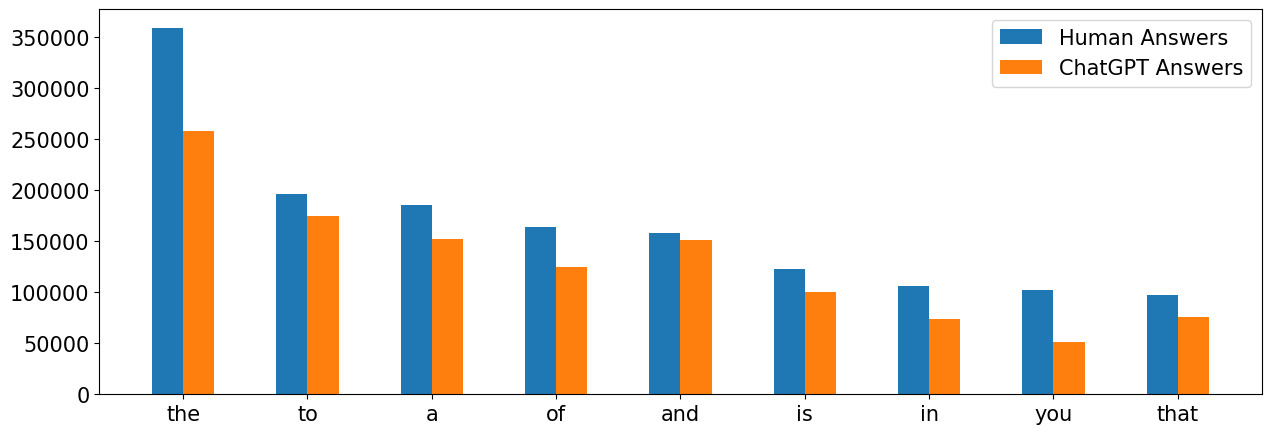

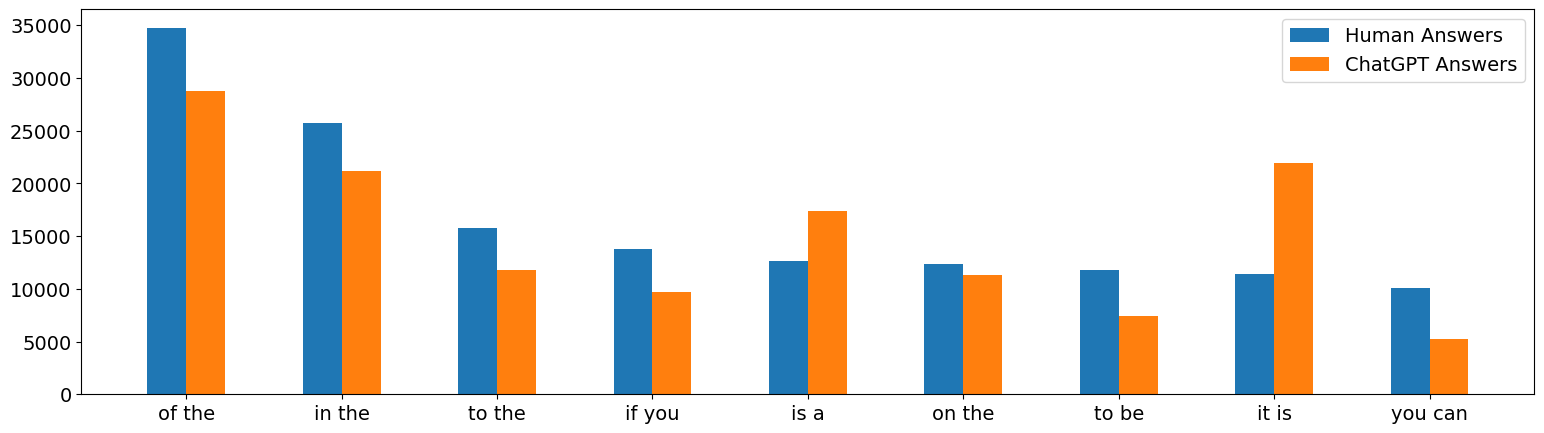

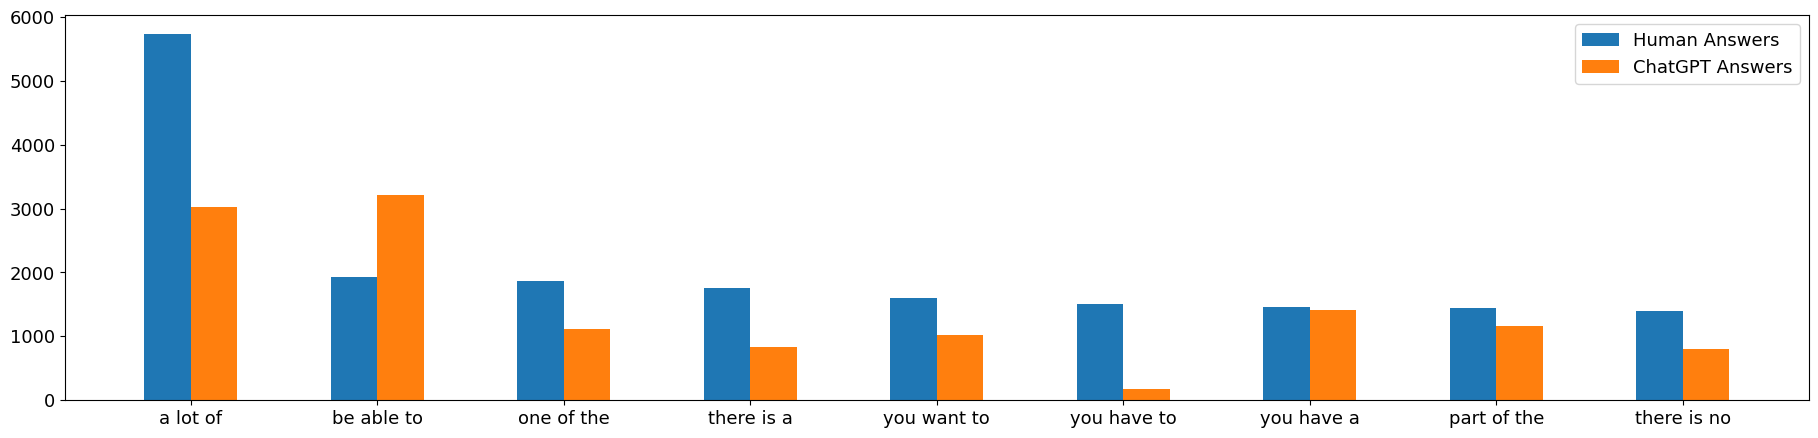

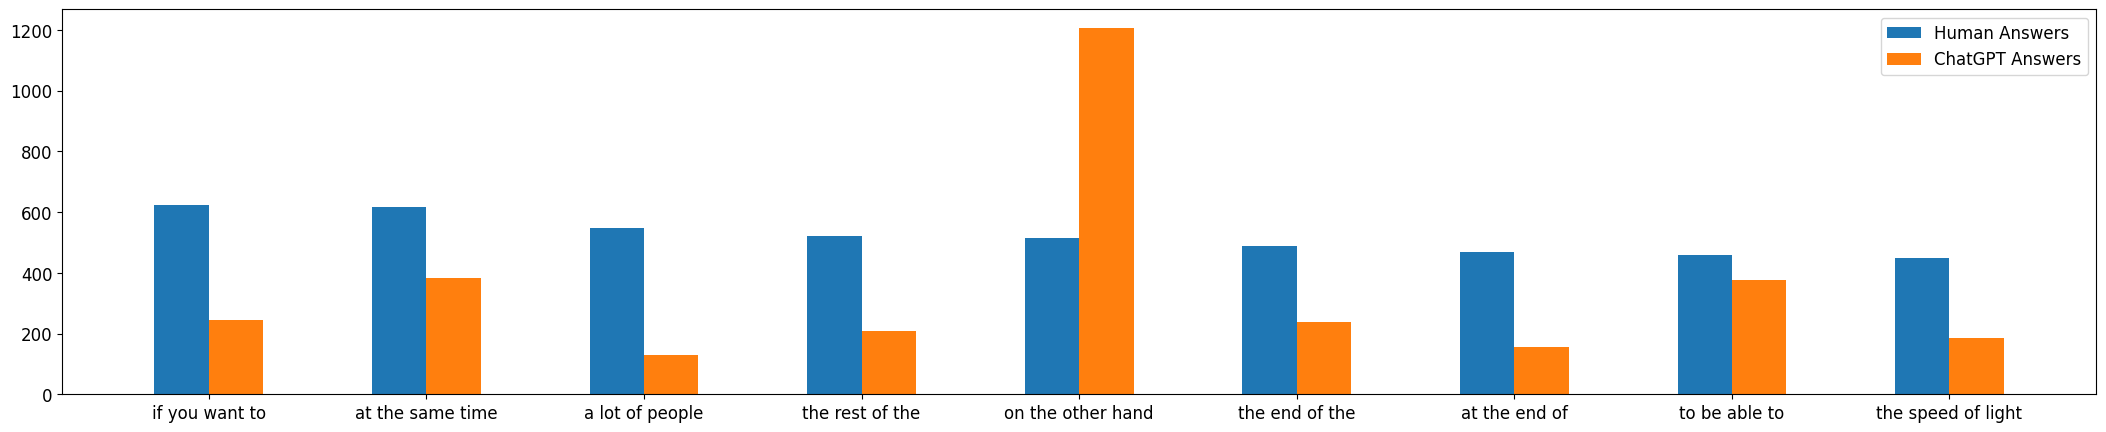

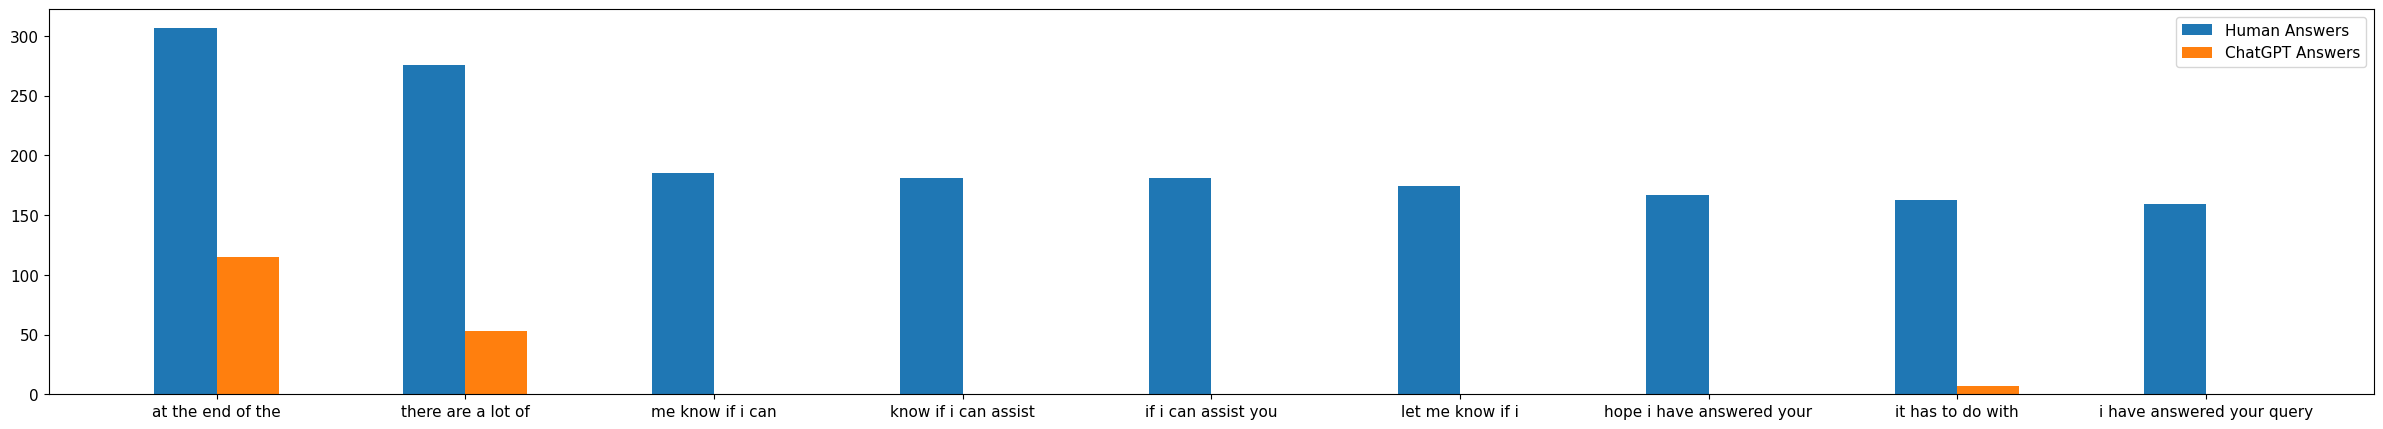

In [ ]:
for n in range(5):
    matplotlib.rcParams.update({'font.size': 15-n})
    ca =  dist[n]["ca"]
    ha = dist[n]["ha"]
    tr = lambda ha: ([x[0] for x in ha], [x[1] for x in ha])
    ha_x, ha_y = tr(ha.most_common(10-1))
    ca_y = [ca[x] for x in ha_x]
    fig = plt.figure(figsize=((n/4+1)*15, 5))
    r = np.arange(len(ha_x))
    width = 0.25
    plt.bar(r, ha_y, width=width, label="Human Answers")
    plt.bar(r + width, ca_y, width=width, label="ChatGPT Answers")
    plt.xticks(r+width/2, [" ".join(x) for x in ha_x])
    plt.legend()
    # plt.show()
    plt.savefig(f"ha_vs_ca_{n}.pdf", format="pdf", bbox_inches="tight")

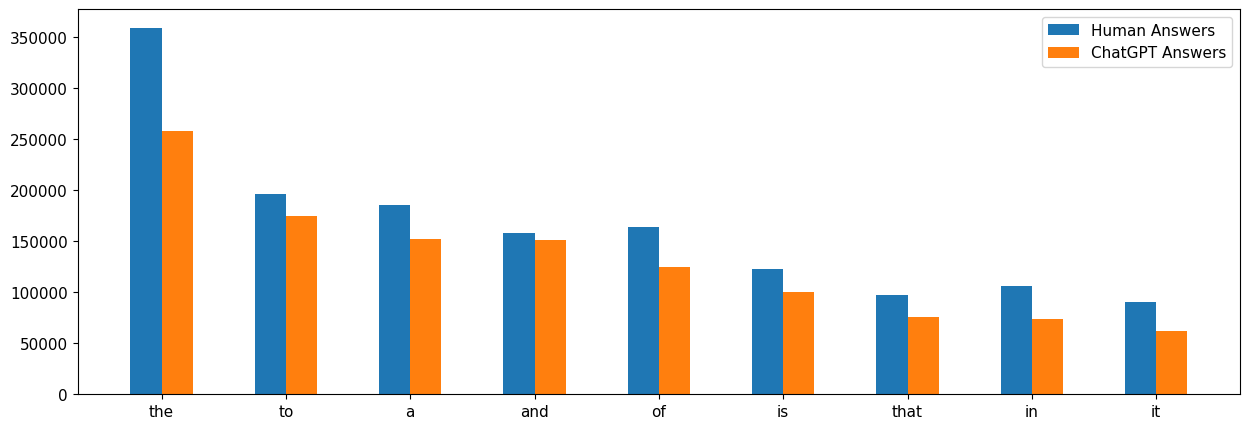

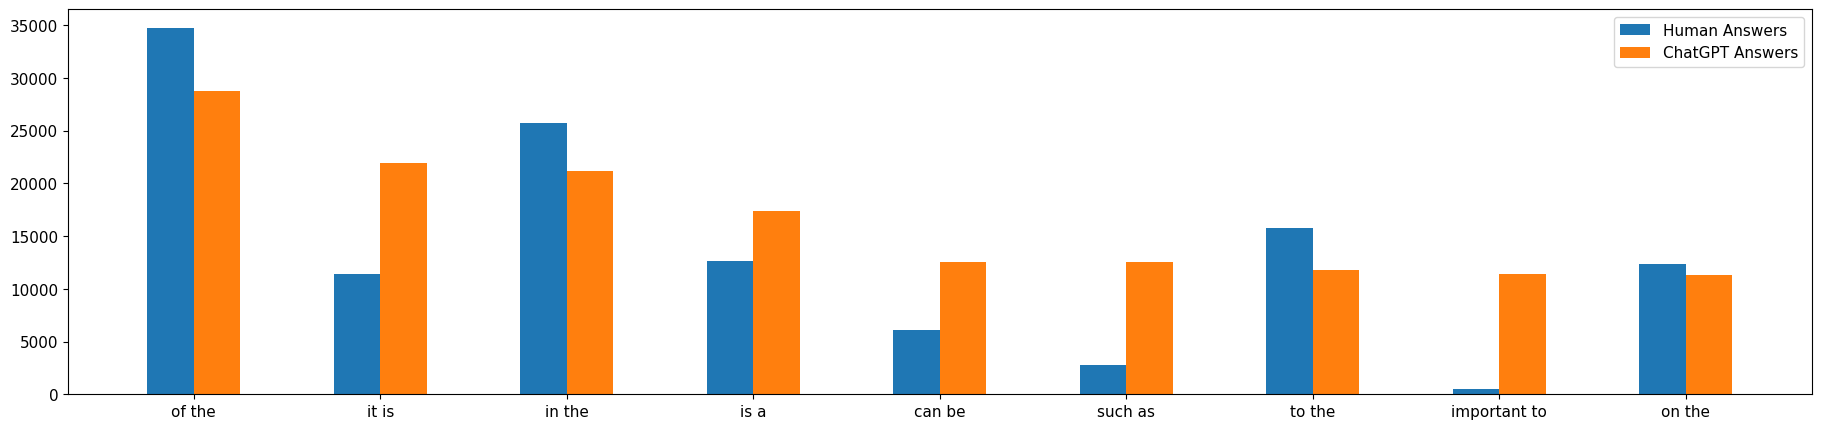

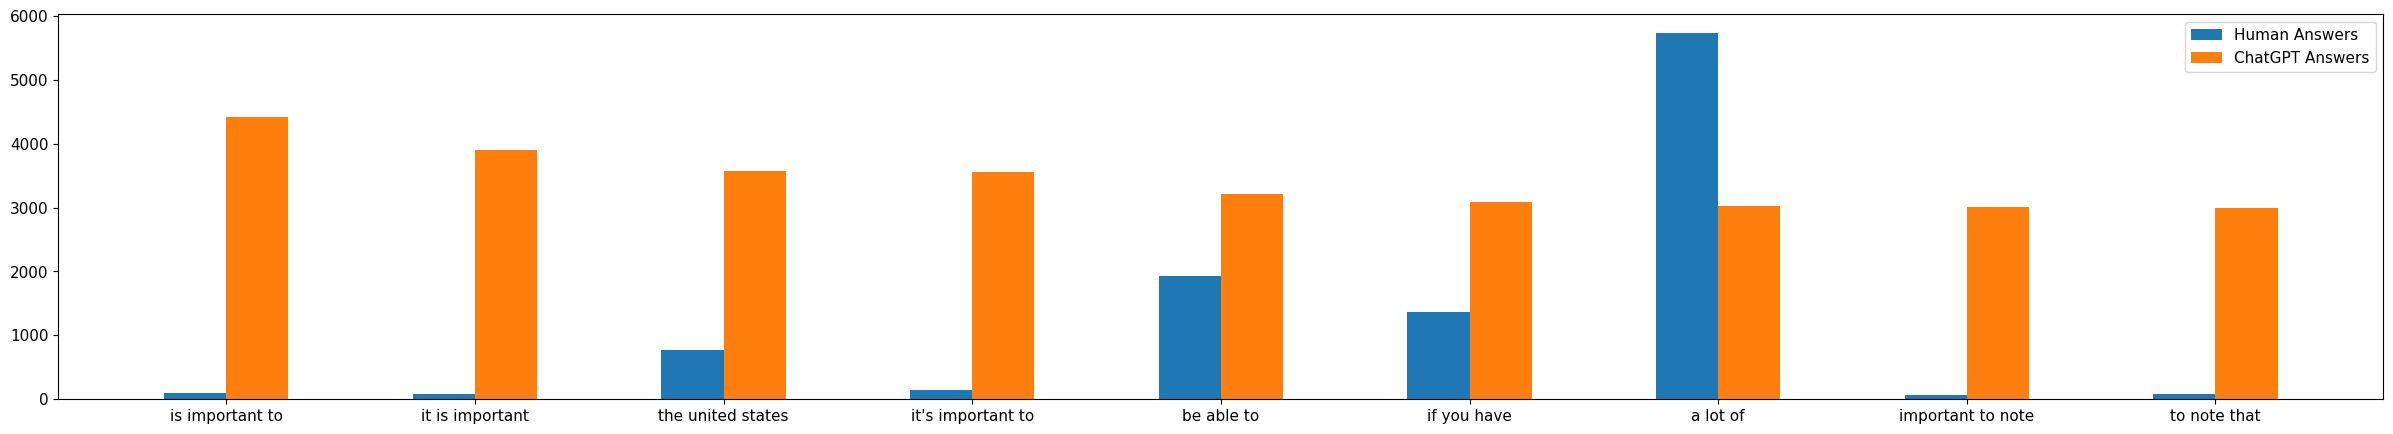

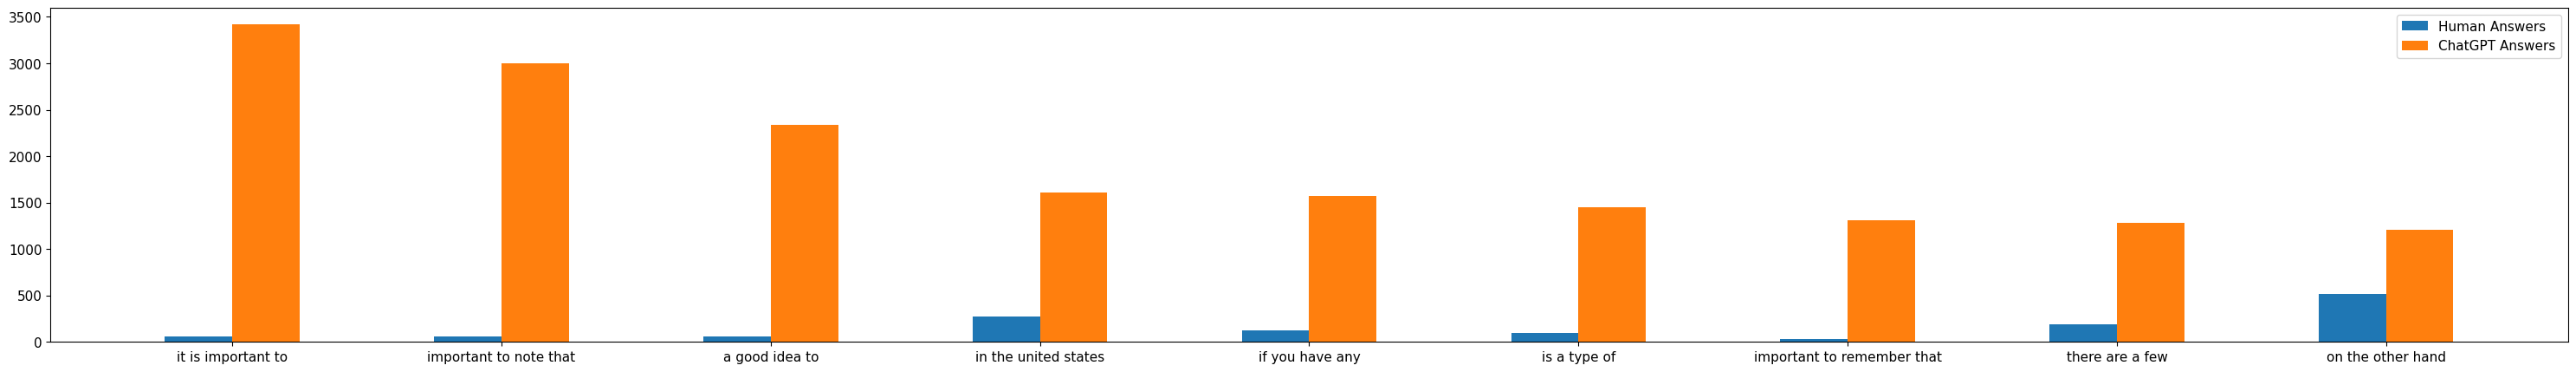

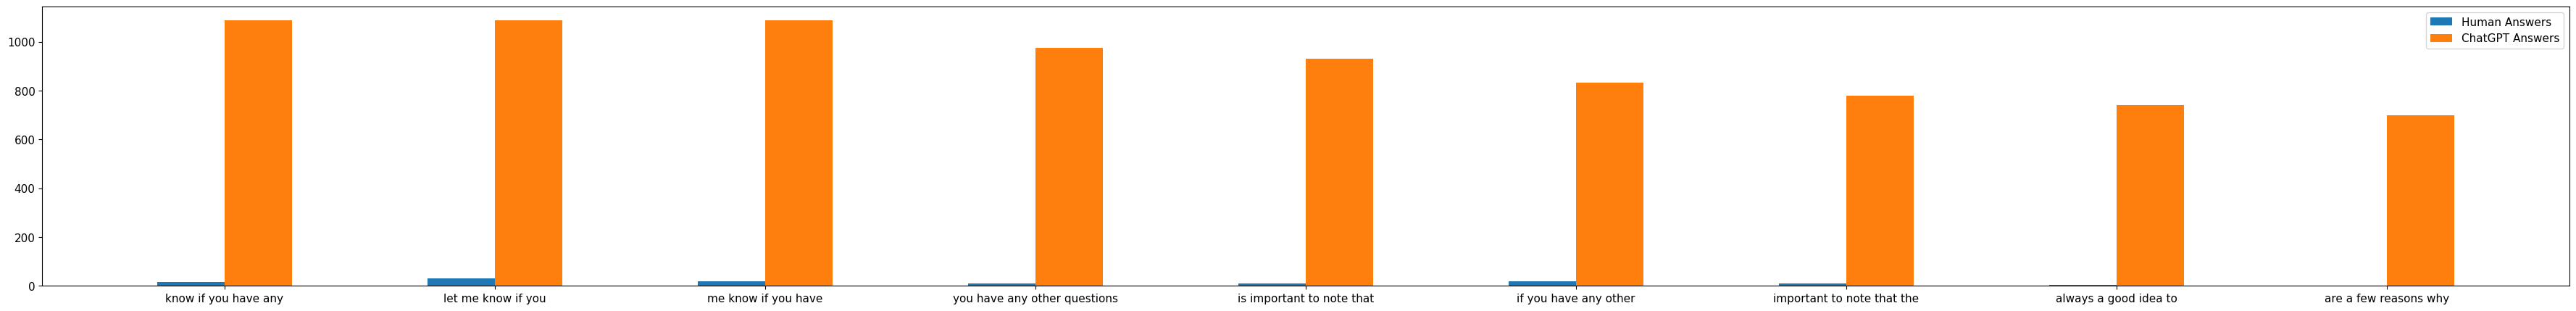

In [ ]:
for n in range(5):
    ca =  dist[n]["ca"]
    ha = dist[n]["ha"]
    tr = lambda ha: ([x[0] for x in ha], [x[1] for x in ha])
    ha_x, ca_y = tr(ca.most_common(10-1))
    ha_y = [ha[x] for x in ha_x]
    fig = plt.figure(figsize=((n/2+1)*15, 5))
    r = np.arange(len(ha_x))
    width = 0.25
    plt.bar(r, ha_y, width=width, label="Human Answers")
    plt.bar(r + width, ca_y, width=width, label="ChatGPT Answers")
    plt.xticks(r+width/2, [" ".join(x) for x in ha_x])
    plt.legend()
    # plt.show()
    plt.savefig(f"ca_vs_ha_{n}.pdf", format="pdf", bbox_inches="tight")



1. Objective vs subjective(I, We)
2. Contractions(I'll, wouldn't, etc)
3. It is important to note



In [ ]:
ca[("important",)]

0

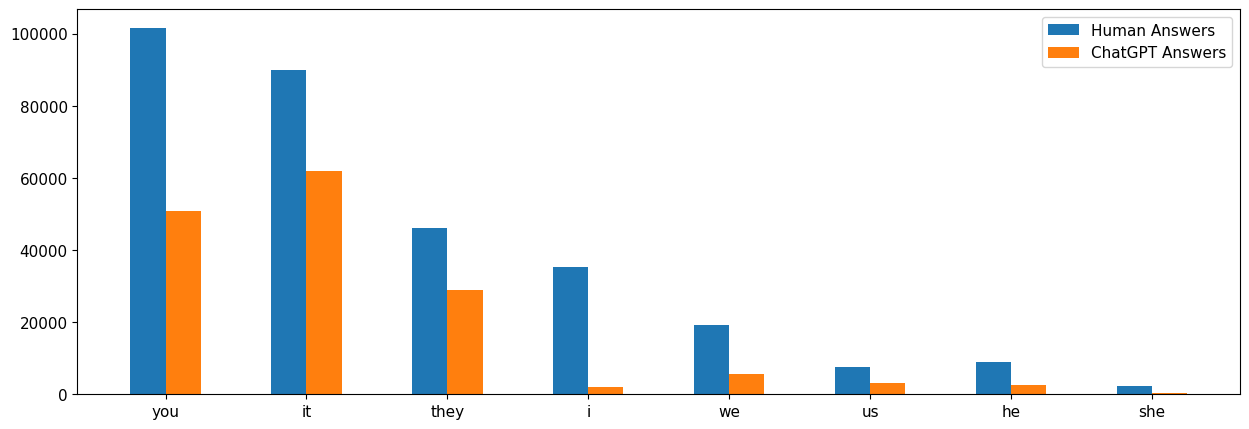

In [ ]:
ca =  dist[0]["ca"]
ha = dist[0]["ha"]
tr = lambda ha: ([x[0] for x in ha], [x[1] for x in ha])
ha_x = [('you',), ('it', ), ('they', ), ("i",), ("we",), ('us',), ('he', ), ('she', )]
ca_y = [ca[x] for x in ha_x]
ha_y = [ha[x] for x in ha_x]
fig = plt.figure(figsize=(15, 5))
r = np.arange(len(ha_x))
width = 0.25
plt.bar(r, ha_y, width=width, label="Human Answers")
plt.bar(r + width, ca_y, width=width, label="ChatGPT Answers")
plt.xticks(r+width/2, [" ".join(x) for x in ha_x])
plt.legend()
# plt.show()
plt.savefig(f"subjectiveness.pdf", format="pdf", bbox_inches="tight")

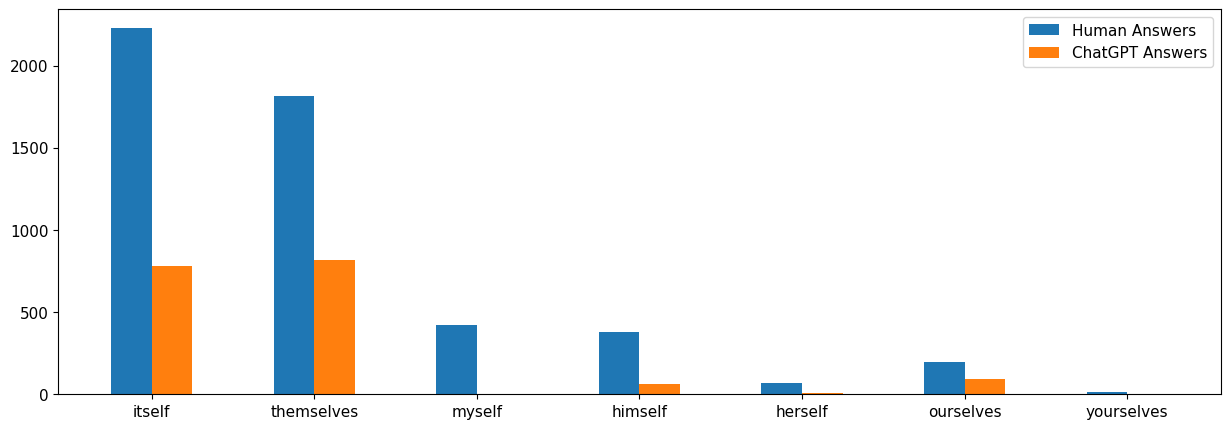

In [ ]:
ref = ["itself", "themselves", "myself", "himself", "herself", "ourselves", "yourselves"]
ref = [(x, ) for x in ref]

ca =  dist[0]["ca"]
ha = dist[0]["ha"]
tr = lambda ha: ([x[0] for x in ha], [x[1] for x in ha])
ha_x = ref
ca_y = [ca[x] for x in ha_x]
ha_y = [ha[x] for x in ha_x]
fig = plt.figure(figsize=(15, 5))
r = np.arange(len(ha_x))
width = 0.25
plt.bar(r, ha_y, width=width, label="Human Answers")
plt.bar(r + width, ca_y, width=width, label="ChatGPT Answers")
plt.xticks(r+width/2, [" ".join(x) for x in ha_x])
plt.legend()
# plt.show()
plt.savefig(f"reflexive_words.pdf", format="pdf", bbox_inches="tight")

In [ ]:
contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

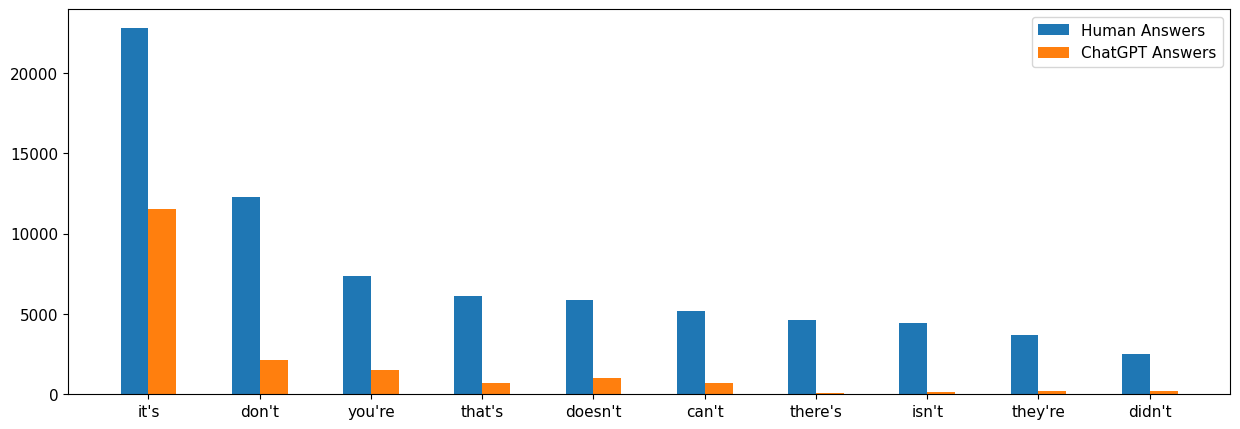

In [ ]:

ca =  dist[0]["ca"]
ha = dist[0]["ha"]
tr = lambda ha: ([x[0] for x in ha], [x[1] for x in ha])
ha_x = []
for key in contractions.keys():
    if (key, ) in ca:
        ha_x.append((key, ))
ha_x = sorted(ha_x, key=lambda x: ha[x])[::-1][:10]
ca_y = [ca[x] for x in ha_x]
ha_y = [ha[x] for x in ha_x]
fig = plt.figure(figsize=(15, 5))
r = np.arange(len(ha_x))
width = 0.25
plt.bar(r, ha_y, width=width, label="Human Answers")
plt.bar(r + width, ca_y, width=width, label="ChatGPT Answers")
plt.xticks(r+width/2, [" ".join(x) for x in ha_x])

plt.legend()
# plt.show()
plt.savefig(f"contractions.pdf", format="pdf", bbox_inches="tight")

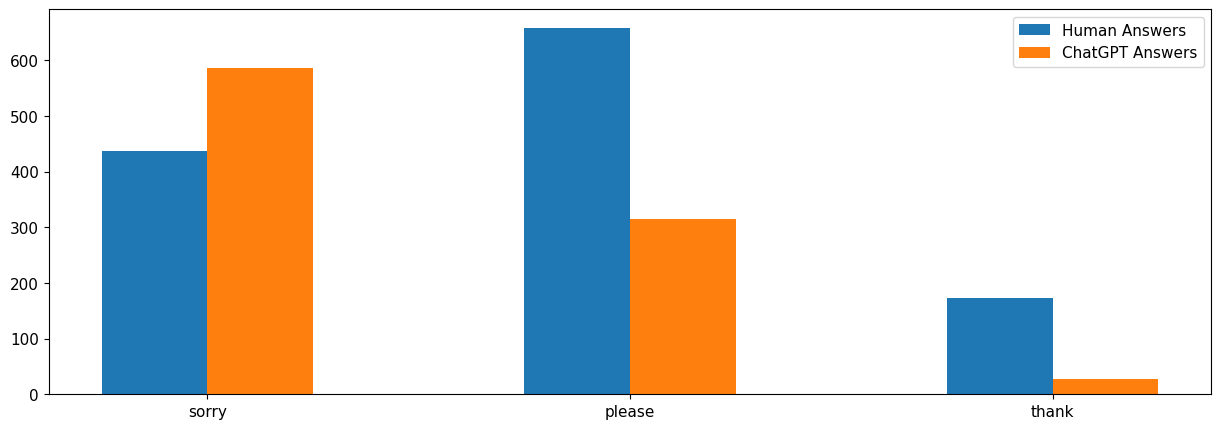

In [ ]:
ref = ["sorry", "please", "thank"]
ref = [(x, ) for x in ref]

ca =  dist[0]["ca"]
ha = dist[0]["ha"]
tr = lambda ha: ([x[0] for x in ha], [x[1] for x in ha])
ha_x = ref
ca_y = [ca[x] for x in ha_x]
ha_y = [ha[x] for x in ha_x]
fig = plt.figure(figsize=(15, 5))
r = np.arange(len(ha_x))
width = 0.25
plt.bar(r, ha_y, width=width, label="Human Answers")
plt.bar(r + width, ca_y, width=width, label="ChatGPT Answers")
plt.xticks(r+width/2, [" ".join(x) for x in ha_x])
plt.legend()
# plt.show()
plt.savefig(f"reflexive_words.pdf", format="pdf", bbox_inches="tight")